In [5]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [60]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [61]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5692 entries, 1995-01-03 to 2017-08-09
Data columns (total 4 columns):
PG      5692 non-null float64
MSFT    5692 non-null float64
F       5692 non-null float64
GE      5692 non-null float64
dtypes: float64(4)
memory usage: 222.3 KB


In [62]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,9.027610,2.524355,5.155141,4.524664
1995-01-04,8.955246,2.542705,5.293846,4.524664
1995-01-05,8.828607,2.500764,5.247612,4.535753
1995-01-06,8.846698,2.542705,5.247612,4.513574
1995-01-09,8.810512,2.526976,5.340079,4.469215


In [63]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2017-08-03,90.860001,72.150002,10.93,25.760000
2017-08-04,90.669998,72.680000,10.95,25.780001
2017-08-07,91.440002,72.400002,10.92,25.629999
2017-08-08,91.580002,72.790001,10.89,25.559999
2017-08-09,91.919998,72.470001,10.92,25.709999


In [64]:
# normalize the data to 100 (Pt/P0) * 100
# first row of entire data (p0)
mydata.iloc[0]

PG      9.027610
MSFT    2.524355
F       5.155141
GE      4.524664
Name: 1995-01-03 00:00:00, dtype: float64

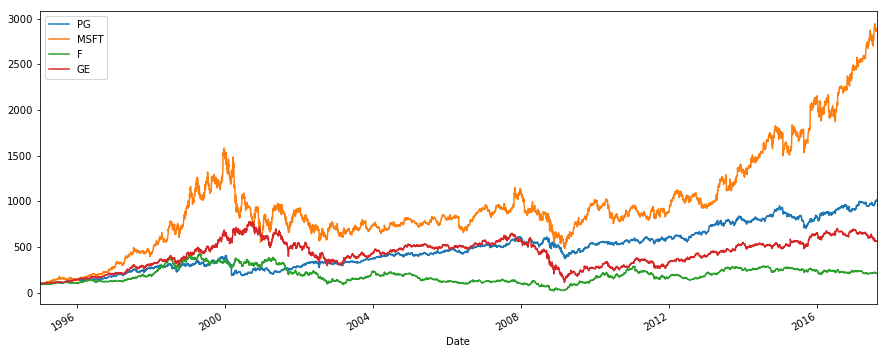

In [65]:
%matplotlib inline
(mydata / mydata.iloc[0] * 100).plot(figsize=(15, 6))
#plt.show()

# Calculating the Return of a Portfolio of Securities

In [66]:
returns = (mydata / mydata.shift(1)) -1

In [67]:
weights = np.array([0.25,0.25,0.25,0.25,])

In [68]:
#np.dot(returns, weights)

In [69]:
annual_returns = returns.mean() * 250

In [70]:
annual_returns

PG      0.127589
MSFT    0.197862
F       0.114074
GE      0.118787
dtype: float64

In [71]:
np.dot(annual_returns, weights)

0.13957798924412831

In [72]:
portfolio_1 = 'Portfolio_1 Annual Return: ' + str(round(np.dot(annual_returns, weights), 5) * 100) + '%'

In [73]:
print portfolio_1

Portfolio_1 Annual Return: 13.958%


In [74]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [75]:
np.dot(annual_returns, weights_2)

0.15323108834934335

In [76]:
portfolio_2 = 'Portfolio_2 Annual Return: ' + str(round(np.dot(annual_returns, weights_2), 5) * 100) + '%'

In [77]:
print portfolio_1
print portfolio_2

Portfolio_1 Annual Return: 13.958%
Portfolio_2 Annual Return: 15.323%
